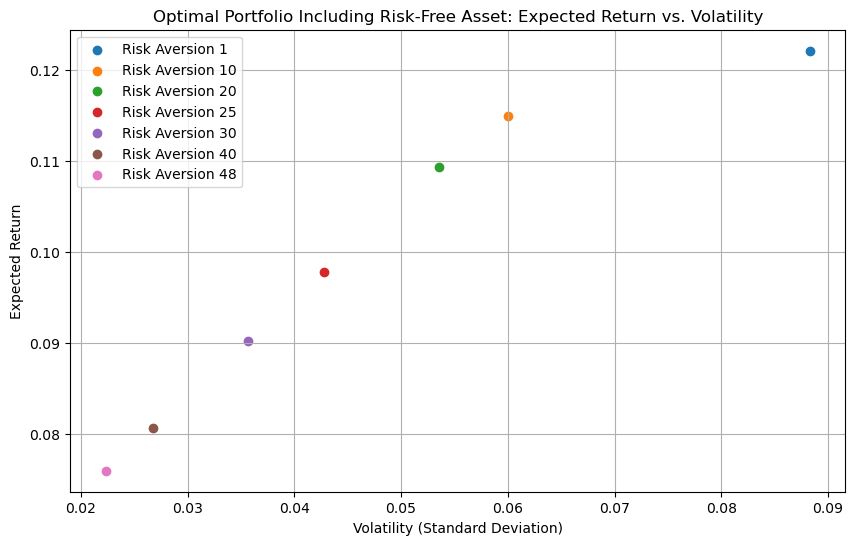


Risk Aversion 1:
Portfolio Weights:
SPY: 31.10%
VTI: 0.00%
IVV: 0.00%
QQQ: 20.59%
VXUS: 0.00%
IJH: 17.44%
IJR: 22.89%
VEA: 0.00%
VWO: 7.97%
DIA: 0.00%
Risk-Free Asset: 0.00%
Expected Return: 12.21%
Volatility: 8.83%

Risk Aversion 10:
Portfolio Weights:
SPY: 19.03%
VTI: 13.05%
IVV: 7.71%
QQQ: 8.42%
VXUS: 3.61%
IJH: 12.62%
IJR: 11.36%
VEA: 1.38%
VWO: 8.87%
DIA: 13.94%
Risk-Free Asset: 0.00%
Expected Return: 11.49%
Volatility: 6.00%

Risk Aversion 20:
Portfolio Weights:
SPY: 15.61%
VTI: 12.04%
IVV: 9.59%
QQQ: 6.58%
VXUS: 7.44%
IJH: 10.46%
IJR: 9.25%
VEA: 4.76%
VWO: 7.53%
DIA: 12.75%
Risk-Free Asset: 4.00%
Expected Return: 10.93%
Volatility: 5.35%

Risk Aversion 25:
Portfolio Weights:
SPY: 12.47%
VTI: 9.62%
IVV: 7.66%
QQQ: 5.26%
VXUS: 5.94%
IJH: 8.36%
IJR: 7.39%
VEA: 3.80%
VWO: 6.02%
DIA: 10.19%
Risk-Free Asset: 23.31%
Expected Return: 9.78%
Volatility: 4.28%

Risk Aversion 30:
Portfolio Weights:
SPY: 10.40%
VTI: 8.01%
IVV: 6.37%
QQQ: 4.38%
VXUS: 4.94%
IJH: 6.96%
IJR: 6.15%
VEA: 3.16%
VW

In [2]:
# FIRST PART
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define your data
data = {
    "Ticker": ["SPY", "VTI", "IVV", "QQQ", "VXUS", "IJH", "IJR", "VEA", "VWO", "DIA"],
    "Expected_Annual_Return": [0.108188666, 0.096446694, 0.083852050, 0.119989920, 0.054498611, 0.106244744, 0.109327738, 0.050395642, 0.083627997, 0.093158757],
    "Annualized_Std": [0.149081152, 0.155670667, 0.152766778, 0.237048576, 0.154296208, 0.179966529, 0.195530476, 0.183122006, 0.209327784, 0.152161572],
    "Total_Expected_Return": [0.121388666, 0.110446694, 0.096852050, 0.125989920, 0.087498611, 0.119744744, 0.122727738, 0.083895642, 0.118027997, 0.111158757]
}
df = pd.DataFrame(data)

# Adding risk-free asset
risk_free_return = 0.05209
risk_free_volatility = 0.0

# Risk aversion levels
risk_aversions = [1, 10, 20, 25, 30, 40, 48]

# Convert annualized standard deviation to covariance matrix
covariance_matrix = np.diag(df['Annualized_Std']**2)
extended_cov_matrix = np.pad(covariance_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)

# Extended returns array including the risk-free asset
extended_returns = np.append(df['Total_Expected_Return'].values, risk_free_return)

# Initial guess and bounds
initial_guess = np.full(len(extended_returns), 1/len(extended_returns))
bounds = tuple((0, 1) for _ in range(len(extended_returns)))

# Constraints
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Portfolio performance calculation
def portfolio_performance(weights, returns, covariance_matrix):
    port_return = np.sum(weights * returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return port_return, port_volatility

# Utility function to minimize
def minimize_function(weights, risk_aversion, returns, covariance_matrix):
    port_return, port_volatility = portfolio_performance(weights, returns, covariance_matrix)
    utility = port_return - (risk_aversion / 2) * (port_volatility**2)
    return -utility

# Optimization process
optimal_portfolios = []
for aversion in risk_aversions:
    result = minimize(minimize_function, initial_guess, args=(aversion, extended_returns, extended_cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        port_return, port_volatility = portfolio_performance(result.x, extended_returns, extended_cov_matrix)
        optimal_portfolios.append({
            "Risk Aversion": aversion,
            "Weights": result.x,
            "Expected Return": port_return,
            "Volatility": port_volatility
        })

# Output results
optimal_portfolios_df = pd.DataFrame(optimal_portfolios)

# Plotting the results
plt.figure(figsize=(10, 6))
for index, row in optimal_portfolios_df.iterrows():
    plt.scatter(row["Volatility"], row["Expected Return"], label=f'Risk Aversion {row["Risk Aversion"]}')
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Expected Return")
plt.title("Optimal Portfolio Including Risk-Free Asset: Expected Return vs. Volatility")
plt.legend()
plt.grid(True)
plt.show()

# Print portfolio weights
for index, row in optimal_portfolios_df.iterrows():
    print(f"\nRisk Aversion {row['Risk Aversion']}:")
    print("Portfolio Weights:")
    for i, ticker in enumerate(df['Ticker'].tolist() + ['Risk-Free Asset']):
        print(f"{ticker}: {row['Weights'][i]*100:.2f}%")
    print(f"Expected Return: {row['Expected Return']*100:.2f}%")
    print(f"Volatility: {row['Volatility']*100:.2f}%")

Simulation 1 Portfolio Value at Year 40: $1,443,248.70
Simulation 2 Portfolio Value at Year 40: $1,940,953.53
Simulation 3 Portfolio Value at Year 40: $2,076,370.89
Simulation 4 Portfolio Value at Year 40: $1,928,618.65
Simulation 5 Portfolio Value at Year 40: $2,261,365.36


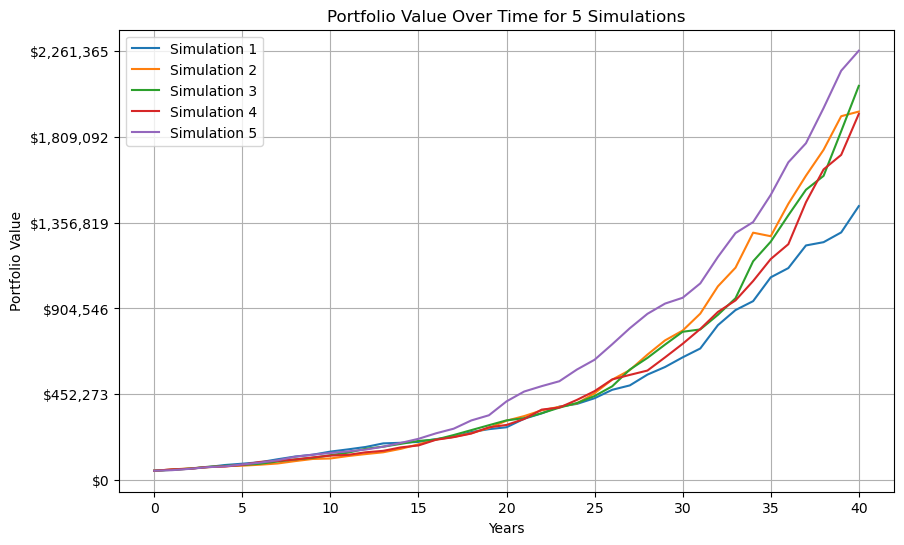

In [3]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import plotly.graph_objs as go

# Load the ticker returns data
df = pd.read_csv('inputs/index_data.csv')

#10 year treasury
risk_free_return = 0.04497
risk_free_volatility = 0.0

# Sidebar for user inputs
st.sidebar.header("User Inputs for Wealth Management Dashboard")
st.sidebar.subheader("Portfolio Allocation Inputs")
#risk_aversion = st.sidebar.slider("Select your portfolio risk level:", 1, 100, 5)
risk_levels = {
    "Very Low Risk": 73,
    "Low Risk": 54,
    "Medium Risk": 36,
    "High Risk": 18,
    "Very High Risk": 1
}
selected_risk_level = st.sidebar.selectbox(
    "Select your portfolio risk level:",
    options=list(risk_levels.keys())
)
# Retrieve the integer risk aversion value corresponding to the selected risk level
risk_aversion = risk_levels[selected_risk_level]


st.sidebar.subheader("Portfolio Simulation Inputs")
investment_amount = st.sidebar.number_input("Enter the amount you want to invest:", min_value=1000, step=500)


# Convert annualized standard deviation to covariance matrix
covariance_matrix = np.diag(df['Annualized_Std']**2)
extended_cov_matrix = np.pad(covariance_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)

# Extended returns array including the risk-free asset
extended_returns = np.append(df['Total Expected Return (%)'].values, risk_free_return)

# Initial guess and bounds for the optimization
initial_guess = np.full(len(extended_returns), 1/len(extended_returns))
bounds = tuple((0, 1) for _ in range(len(extended_returns)))

# Constraints to ensure the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Portfolio performance calculation function
def portfolio_performance(weights, returns, covariance_matrix):
    port_return = np.sum(weights * returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return port_return, port_volatility

# Minimize utility function adjusted for risk aversion
def minimize_function(weights, risk_aversion, returns, covariance_matrix):
    port_return, port_volatility = portfolio_performance(weights, returns, covariance_matrix)
    utility = port_return - (risk_aversion / 2) * (port_volatility**2)
    return -utility

# Optimization process using user-defined risk aversion
result = minimize(minimize_function, initial_guess, args=(risk_aversion, extended_returns, extended_cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    port_return, port_volatility = portfolio_performance(result.x, extended_returns, extended_cov_matrix)
    st.write(f"Optimized Portfolio for Risk Aversion {risk_aversion}:")
    st.write(f"Expected Return: {port_return:.2%}, Volatility: {port_volatility:.2%}")
    st.write("Portfolio Weights:")
    for i, ticker in enumerate(df['Ticker'].tolist() + ['Risk-Free Asset']):
        st.write(f"{ticker}: {result.x[i]*100:.2f}%")
else:
    st.error("Optimization did not converge")

# Optionally, you can include a plot here as well, or any additional analysis or data visualizations.

################################################################
#Graph code 
risk_level_results = []
for level, ra in risk_levels.items():
    result = minimize(minimize_function, initial_guess, args=(ra, extended_returns, extended_cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        port_return, port_volatility = portfolio_performance(result.x, extended_returns, extended_cov_matrix)
        risk_level_results.append({
            "Risk Level": level,
            "Risk Aversion": ra,
            "Expected Return": port_return,
            "Volatility": port_volatility,
            "Weights": result.x
        })

# Create the Plotly scatter plot
fig = go.Figure()

# Add scatter points for all risk aversion levels
for res in risk_level_results:
    fig.add_trace(go.Scatter(
        x=[res["Volatility"]],
        y=[res["Expected Return"]],
        text=[f"RA: {res['Risk Aversion']}<br>Return: {res['Expected Return']:.2%}<br>Volatility: {res['Volatility']:.2%}"],
        mode="markers",
        name=res["Risk Level"],
        marker=dict(
            size=12 if res["Risk Level"] == selected_risk_level else 8,
            symbol="star" if res["Risk Level"] == selected_risk_level else "circle"
        )
    ))

# Update layout to improve clarity
fig.update_layout(
    title="Risk Aversion Levels: Expected Return vs. Volatility",
    xaxis_title="Volatility (Standard Deviation)",
    yaxis_title="Expected Return",
    legend_title="Risk Levels",
    hovermode="closest"
)

# Display the plot in Streamlit
st.plotly_chart(fig, use_container_width=True)

################################################################
